In [2]:
#Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For plotting
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
color=plt.rcParams["axes.prop_cycle"].by_key()['color']
color_cycle=cycle(plt.rcParams["axes.prop_cycle"].by_key()['color'])

# Load the data

In [3]:
store=pd.read_csv('/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv')
store.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


# Explore Data Analysis 
1. Visualize the descriptive stastics
2. Visualize the Pairplot
3. Visualize the histplots,nuinque values

In [5]:
store.describe().T.style.background_gradient(axis=1,cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
age,99457.000000,43.427089,14.990054,18.000000,30.000000,43.000000,56.000000,69.000000
quantity,99457.000000,3.003429,1.413025,1.000000,2.000000,3.000000,4.000000,5.000000
price,99457.000000,689.256321,941.184567,5.230000,45.450000,203.300000,1200.320000,5250.000000


In [6]:
#Checking the null values in the datset
store.isna().sum()/len(store)

invoice_no        0.0
customer_id       0.0
gender            0.0
age               0.0
category          0.0
quantity          0.0
price             0.0
payment_method    0.0
invoice_date      0.0
shopping_mall     0.0
dtype: float64

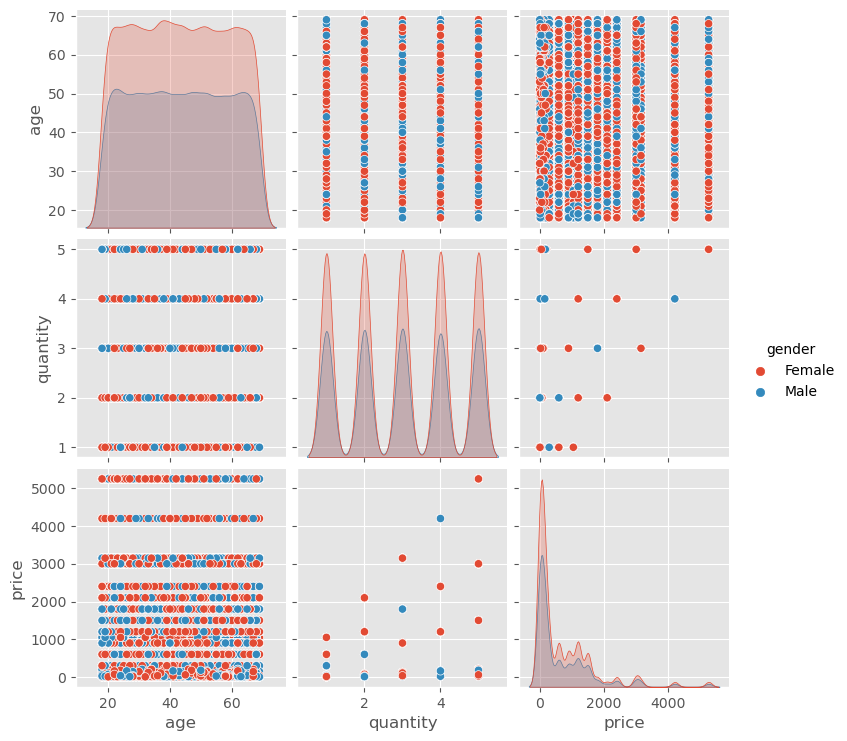

In [7]:
sns.pairplot(store,hue='gender')

In [8]:
#Checking the unique columns
for i in store.columns:
    print(i,'-->',store[i].nunique())

invoice_no --> 99457
customer_id --> 99457
gender --> 2
age --> 52
category --> 8
quantity --> 5
price --> 40
payment_method --> 3
invoice_date --> 797
shopping_mall --> 10


In [9]:
print("The gender in the dataset",end='')
print(store['gender'].unique())
print("The category in the dataset",end='')
print(store['category'].unique())
print("The payment_method in the dataset",end='')
print(store['payment_method'].unique())
print("The shopping_mall in the dataset",end='')
print(store['shopping_mall'].unique())

The gender in the dataset['Female' 'Male']
The category in the dataset['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
The payment_method in the dataset['Credit Card' 'Debit Card' 'Cash']
The shopping_mall in the dataset['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center']


<AxesSubplot:>

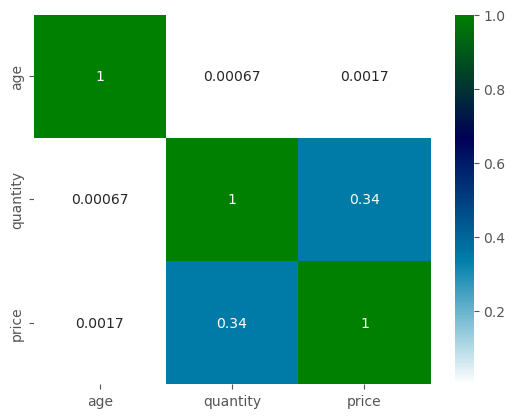

In [10]:
sns.heatmap(store.corr(),annot=True,cmap='ocean_r')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'quantity'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

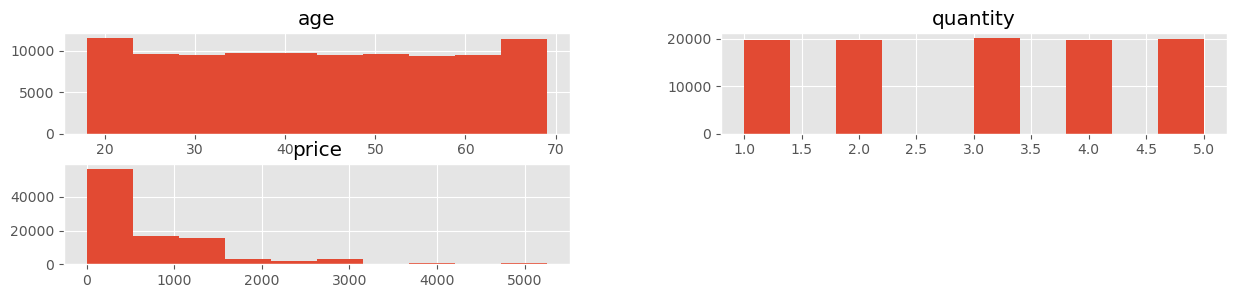

In [11]:
store.hist(figsize=(15,3))

# Box plot and violinplot
* For Numerical columns to visualize the box plot and violinplot plot using for loop

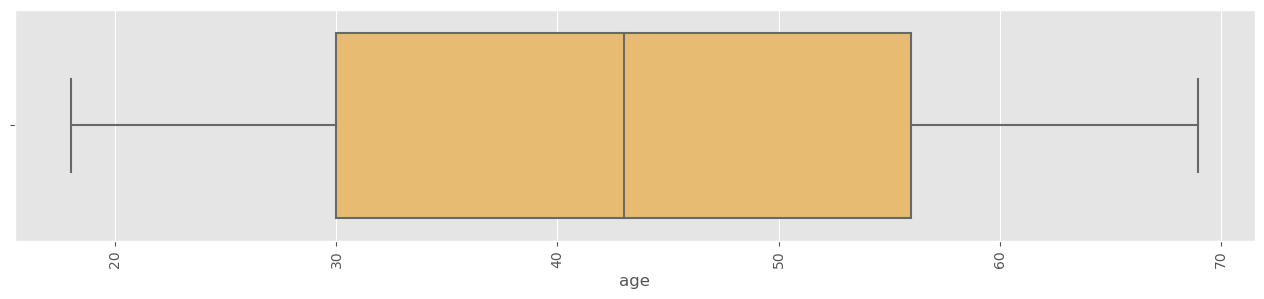

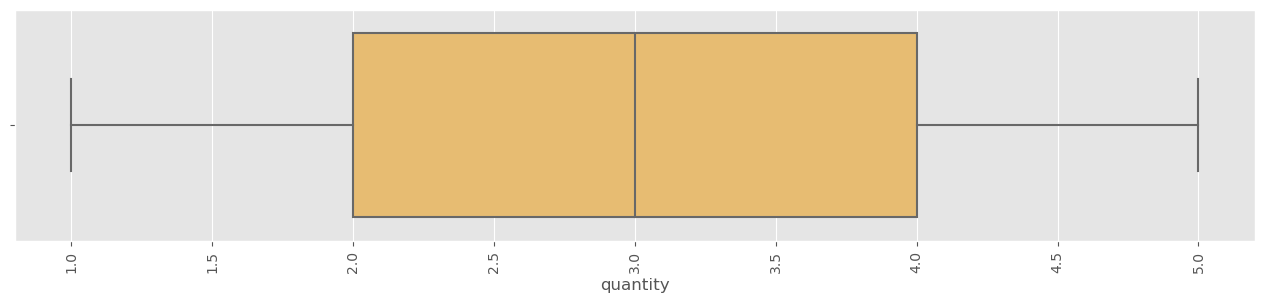

In [12]:
#To visualize the box plot
for i in store.select_dtypes(include='int'):
    plt.figure(figsize=(16,3))
    sns.boxplot(x=store[i],data=store,color=color[4])
    plt.xticks(rotation=90)
    plt.show()

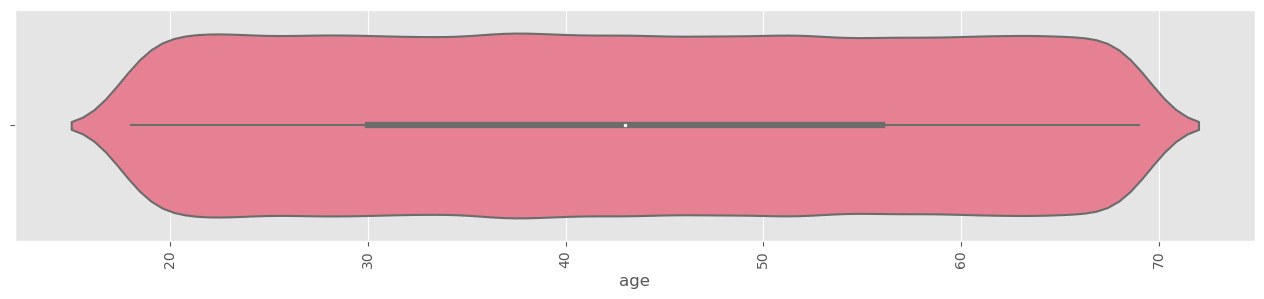

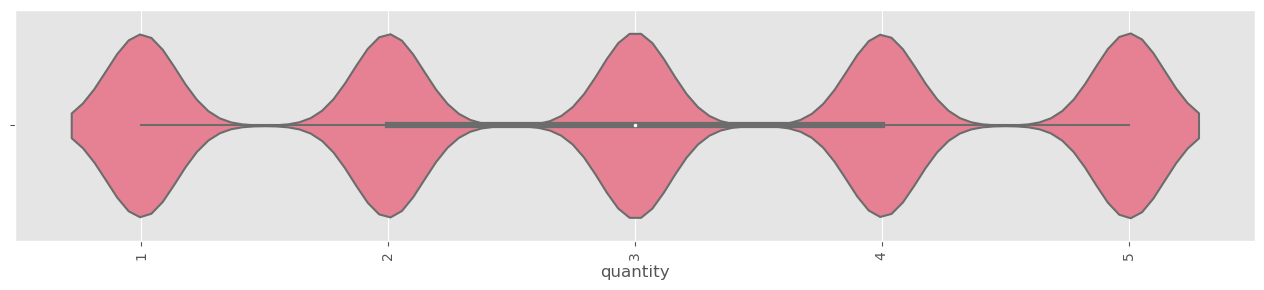

In [13]:
#To visualize the box plot
for i in store.select_dtypes(include='int'):
    plt.figure(figsize=(16,3))
    sns.violinplot(x=store[i],data=store,color=color[4],palette='husl')
    plt.xticks(rotation=90)
    plt.show()

#  Count of the category and visualize with matplotlib

Text(0, 0.5, 'Count of the Value')

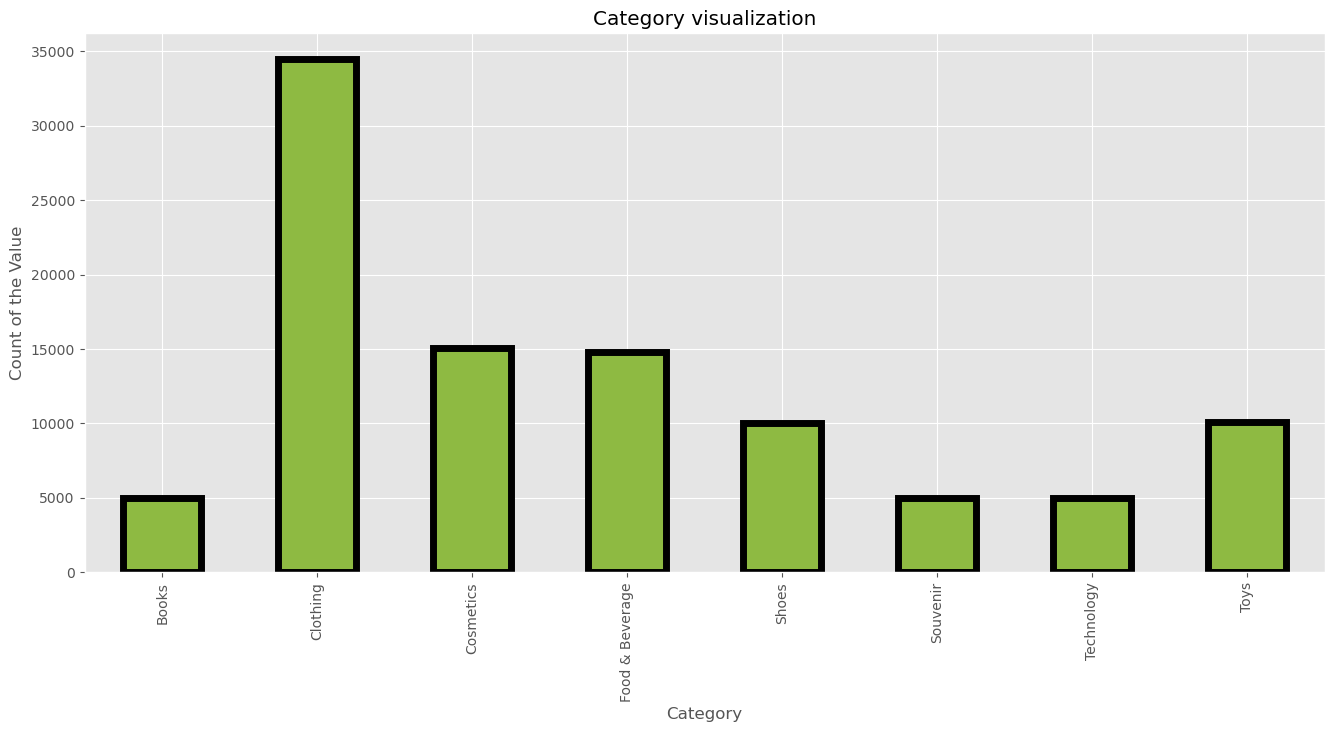

In [14]:
#to visualize the category in the dataset
ax=store['category'].value_counts()\
.sort_index()\
.plot(kind='bar',title="Category visualization",figsize=(16,7),color=color[5],lw=5,edgecolor='black')
ax.set_xlabel("Category")
ax.set_ylabel("Count of the Value")

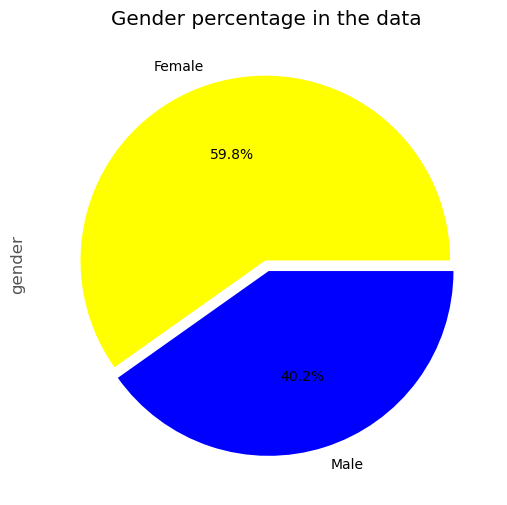

In [15]:
#Let's visualize the gender in the dataset
gender=store['gender'].value_counts()\
.plot(kind='pie',labels=store['gender'].value_counts().index,autopct='%1.1f%%',colors=['yellow','blue'],title='Gender percentage in the data',figsize=(18,6),explode=[0.02,0.04])

# Question asked about data
* Calculate the each age with gender wise and do some background style
* Create distplot to visualize the price with hue values as gender

In [16]:
# To calculate the age with gender 
store.groupby('age')['gender'].value_counts()\
.sort_index()\
.unstack()\
.style.background_gradient(axis=0,cmap='YlOrRd')

gender,Female,Male
age,,
18,1079,765
19,1133,803
20,1102,742
21,1166,781
22,1208,843
23,1095,802
24,1155,822
25,1144,719
26,1156,740


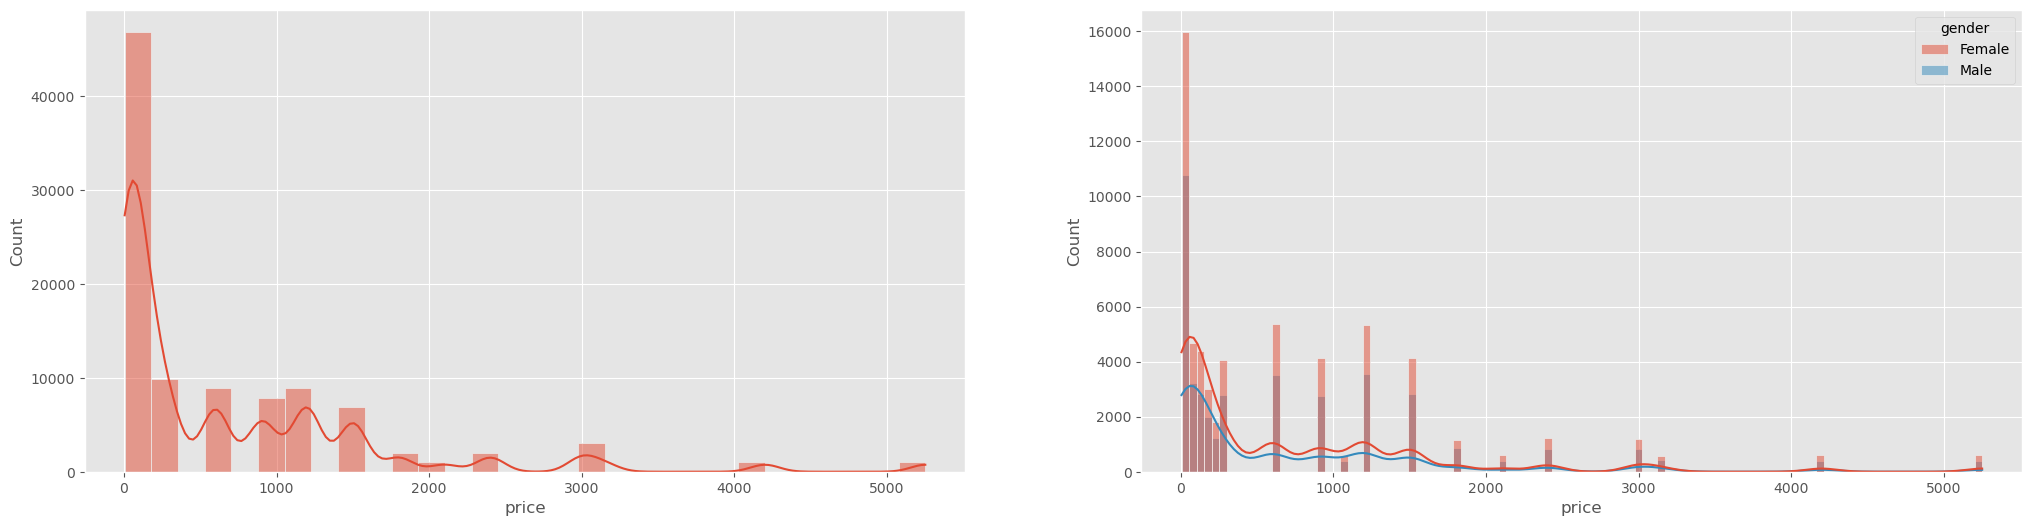

In [17]:
#Let's distribution of the price along with gender
plt.subplots(1,2,figsize=(25,6))
plt.subplot(121)
sns.histplot(data=store,bins=30,x='price',kde=True)
plt.subplot(122)
sns.histplot(data=store,x='price',kde=True,hue='gender')
plt.show()

# Created a function 
* Create a function that's create a new columns which convert categorical with given condition
1. if age>=65 return "old age"
2. then age >= return "Middle aged"
3. Finally return to adult age
# Then we visualize the shopingmall in the data


In [18]:
#write a function to to covert the ages numerical to adult ages
def ages(a):
    if a >=65:
        return "Senior aged person"
    elif a >=45:
        return "Middle aged person"
    else:
        return "Adult age"
store['ages_cate']=store['age'].apply(ages)
store.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,ages_cate
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,Adult age
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,Adult age
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,Adult age
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,Senior aged person
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,Middle aged person


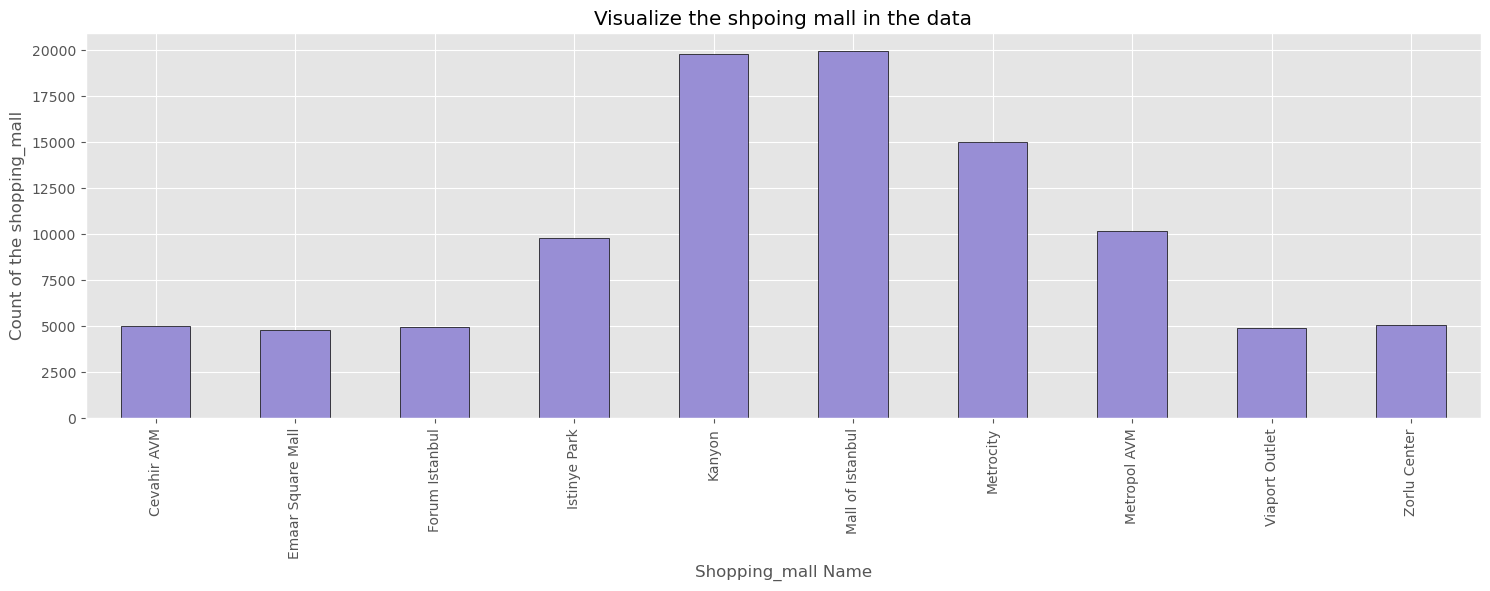

In [19]:
#Visualize the shopping_mall 
shoping=store['shopping_mall'].value_counts()\
.sort_index()\
.plot(kind='bar',color=color[2],title='Visualize the shpoing mall in the data',figsize=(18,5),edgecolor='black')
shoping.set_xlabel("Shopping_mall Name")
shoping.set_ylabel("Count of the shopping_mall")
plt.show()

# 1. We find the paytment method with categorys using group by function with background coloe
# 2. Identify which shoping mall recevide more price
# 3. Find the price of the each shoping mall with different category
# 4. we take the invoice data and extract the date,year,months
# 5 .what we extract in the year columns we visualize it
# 6. Then we visualize the each shpoing mall price with different payment method
# 7. Along with we understand which aged person pepole do more shoping with category wise

In [20]:
#To find the total amount of the each categorys with the payments method
store.groupby('payment_method')['category'].value_counts() \
.sort_index() \
.unstack()\
.style.background_gradient(axis=0,cmap='RdBu_r')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
payment_method,,,,,,,,
Cash,2268,15456,6674,6587,4474,2211,2235,4542
Credit Card,1696,12025,5336,5250,3553,1770,1753,3548
Debit Card,1017,7006,3087,2939,2007,1018,1008,1997


Text(0.5, 0, 'Shopping_mall')

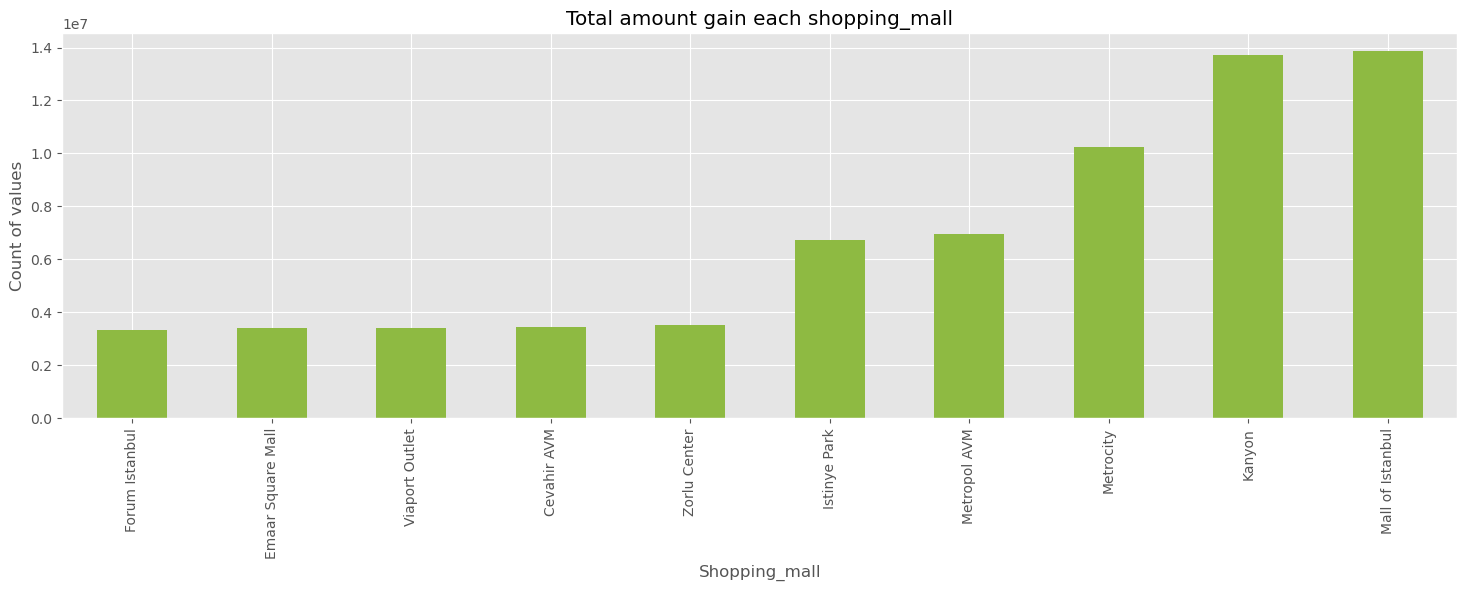

In [21]:
#To find the each shopming mall sales with pri
shoping_mall=store.groupby('shopping_mall')['price'].sum()\
.sort_index().sort_values(ascending=True) \
.plot(kind='bar',title='Total amount gain each shopping_mall',figsize=(18,5),color=color[5])
shoping_mall.set_ylabel("Count of values")
shoping_mall.set_xlabel("Shopping_mall")

In [22]:
#Which shop recevid more amount with category wise
store.groupby(['shopping_mall','category'])[['price']].sum()\
.sort_index() \
.unstack() \
.style.background_gradient(axis=0,cmap='cubehelix')

In [23]:
#Extract the year with invoice_date 
store['invoice_date']=pd.to_datetime(store['invoice_date'])
store['date']=store['invoice_date'].dt.year
store['Month']=store['invoice_date'].dt.month
store['Day']=store['invoice_date'].dt.day

store.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,ages_cate,date,Month,Day
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,Adult age,2022,5,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,Adult age,2021,12,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,Adult age,2021,9,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,Senior aged person,2021,5,16
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,Middle aged person,2021,10,24


In [24]:
#Removing the invoice_date from the dataset
store.drop('invoice_date',axis=1)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,ages_cate,date,Month,Day
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,Adult age,2022,5,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,Adult age,2021,12,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,Adult age,2021,9,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,Senior aged person,2021,5,16
4,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,Middle aged person,2021,10,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,Middle aged person,2022,9,21
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,Adult age,2021,9,22
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,Metrocity,Middle aged person,2021,3,28
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,Istinye Park,Middle aged person,2021,3,16


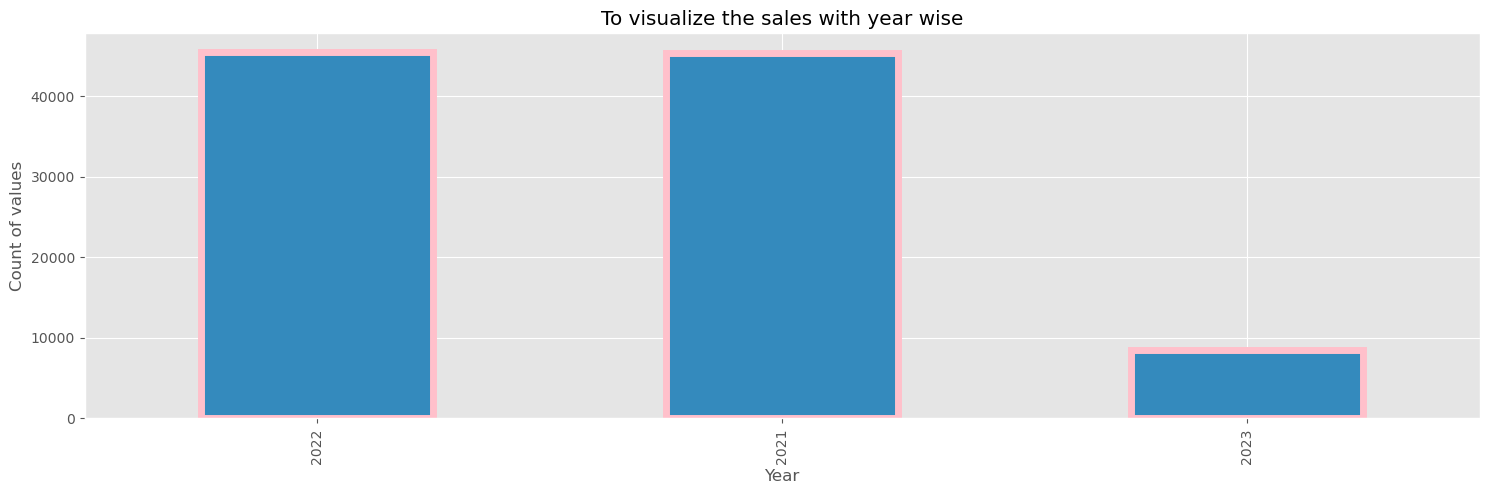

In [25]:
year=store['date'].value_counts()\
.plot(kind='bar',figsize=(18,5),title='To visualize the sales with year wise',color=color[1],lw=5,edgecolor='pink')
year.set_xlabel('Year')
year.set_ylabel("Count of values")
plt.show()

In [26]:
#Let's find the shopingmall with the payment method with price
payment_store=store.groupby(['payment_method','shopping_mall'])[['price']].sum()\
.sort_index()\
.unstack()\
.style.background_gradient(axis=0,cmap='vlag_r')
payment_store

<AxesSubplot:title={'center':'Each shpoing mall total price with different payment methods'}, xlabel='payment_method'>

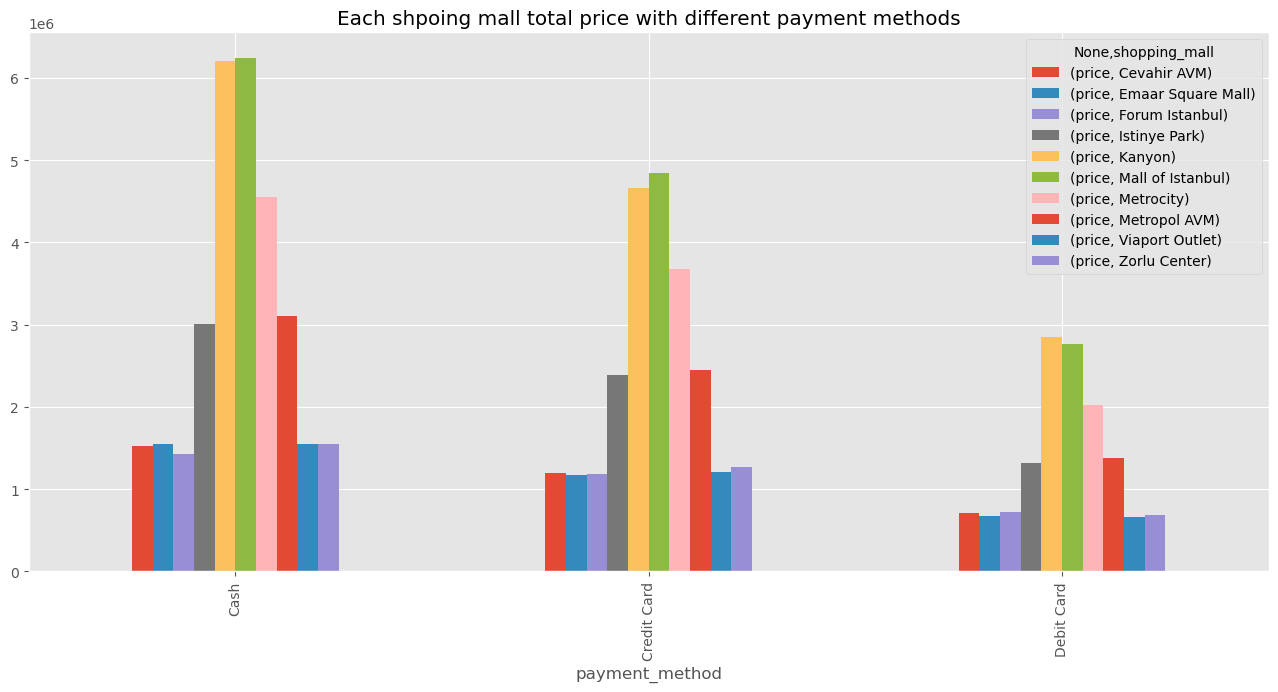

In [27]:
store.groupby(['payment_method','shopping_mall'])[['price']].sum()\
.sort_index()\
.unstack()\
.plot(kind='bar',figsize=(16,7),title="Each shpoing mall total price with different payment methods")

In [28]:
#Identify the which group aged person most shoping done with categorys 
store.groupby('ages_cate')['category'].value_counts()\
.sort_index() \
.unstack()\
.style.background_gradient(cmap='Reds')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
ages_cate,,,,,,,,
Adult age,2570,18040,7802,7779,5196,2637,2653,5301
Middle aged person,1936,13206,5859,5594,3898,1898,1862,3799
Senior aged person,475,3241,1436,1403,940,464,481,987


<AxesSubplot:title={'center':'quantity in the data'}>

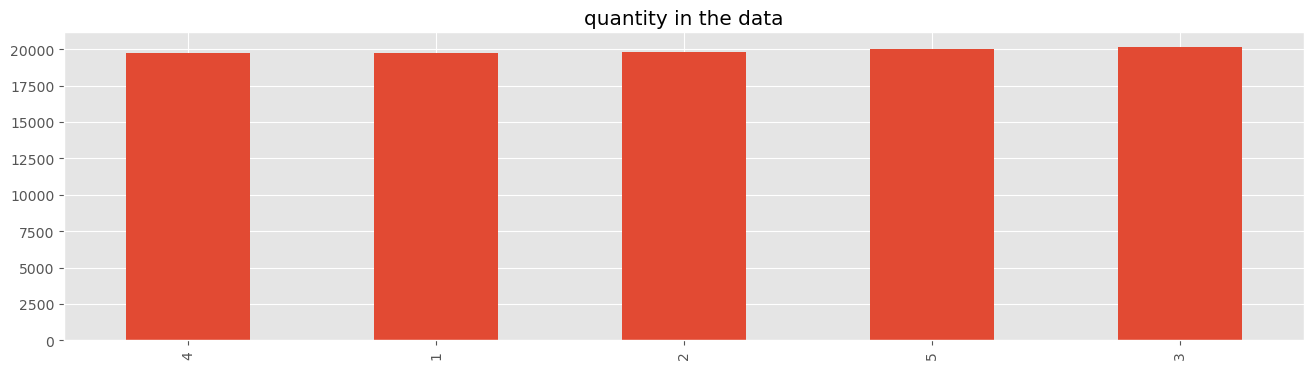

In [29]:
#Let's visualize the quantities in the dataset
store['quantity'].value_counts()\
.sort_values(ascending=True)\
.plot(kind='bar',title="quantity in the data",figsize=(16,4))


In [30]:
for i in store.select_dtypes("object"):
    store[i] = store[i].factorize()[0]

In [31]:
store=store.drop('invoice_date',axis=1)

# We Use Clustening Method to solve the problem

In [32]:
#import the sklearn libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
label=LabelEncoder()
sc=StandardScaler()
x=sc.fit_transform(store)

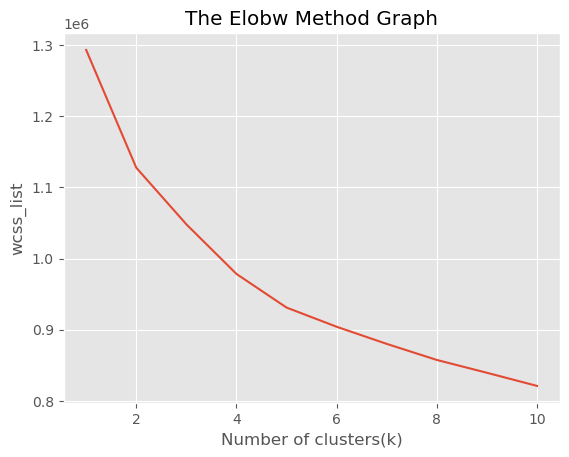

In [33]:
#KMeans cluster method
from sklearn.cluster import KMeans
wcc_list=[]
for i in range(1,11):
    knn=KMeans(n_clusters=i,init='k-means++',random_state=42)
    knn.fit(x)
    wcc_list.append(knn.inertia_)
plt.plot(range(1, 11), wcc_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [34]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

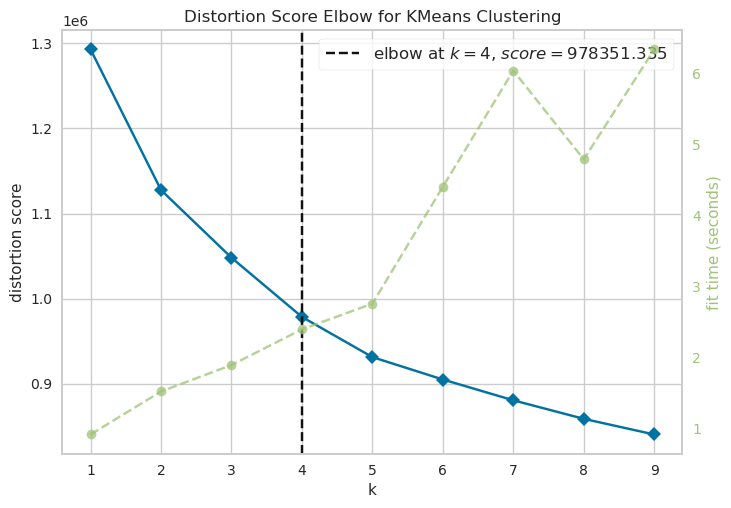

In [35]:
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans()
visualize=KElbowVisualizer(kmeans,k=(1,10))
visualize.fit(x)
visualize.poof()
plt.show()